<a href="https://colab.research.google.com/github/HarrisKucukalic/CSS2_Group_3/blob/main/combined_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to Google Drive, Import Libraries and Datasets

## Connect to drive and check Directory

In [102]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [103]:
%cd /content/gdrive/Shareddrives/CSS2 - Research /Research Code

/content/gdrive/Shareddrives/CSS2 - Research /Research Code


In [104]:
!ls

 Angie.ipynb	       combined_code.ipynb   Isaac.ipynb	    Samuel.ipynb    Timothy.ipynb
'AT2 Prezzo.gslides'   desktop.ini	     mergeNotebooks.ipynb   Test_data.csv   Train_data.csv


## Import necessary libraries

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(rc={"figure.dpi":120, 'savefig.dpi':120})

# sklearn
import sklearn as sk
from sklearn import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
# SVM
from sklearn.svm import SVC

## Intrusion Data

In [106]:
intrusion_data = pd.read_csv('Train_data.csv')
intrusion_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [107]:
intrusion_data['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

In [108]:
value_counts = intrusion_data['class'].value_counts()
total_values = len(intrusion_data['class'].dropna())
percentages = (value_counts / total_values) * 100
print(percentages)

class
normal     53.385996
anomaly    46.614004
Name: count, dtype: float64


# Preprocessing

In [109]:
total_rows = len(intrusion_data)

missing_values = intrusion_data.isna().sum()

percentage_missing = (missing_values / total_rows) * 100
percentage_missing = percentage_missing.round(2)
print(percentage_missing)

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

## Testing Data

In [110]:
for column in intrusion_data.columns:
    print(f"Counts for {column}:")
    print(intrusion_data[column].value_counts())
    print("------------")

Counts for duration:
duration
0        23168
1          374
2          165
3          102
4           75
         ...  
17025        1
12892        1
584          1
10774        1
322          1
Name: count, Length: 758, dtype: int64
------------
Counts for protocol_type:
protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64
------------
Counts for service:
service
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: count, Length: 66, dtype: int64
------------
Counts for flag:
flag
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: count, dtype: int64
------------
Counts for src_bytes:
src_bytes
0        9866
8         738
1         480
44        467
45        416
         ... 
37

#Attribute Analyses and Input selection

In [111]:
intrusion_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
intrusion_data = pd.read_csv('Train_data.csv')

In [113]:
intrusion_data_right = intrusion_data
intrusion_data_right['class_label'] = (intrusion_data_right['class'] == 'anomaly').astype(int)
intrusion_data_right = intrusion_data_right.drop(['class'], axis=1)
intrusion_data_right

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [114]:
int_data_no_strings = intrusion_data_right.select_dtypes(exclude=['object'])
int_data_no_strings

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,334,0,0,0,0,0,0,1,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,0,0,0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,0,0,0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [115]:
from sklearn.feature_selection import mutual_info_classif

X = int_data_no_strings.drop('class_label', axis=1)
y = int_data_no_strings['class_label']

mutual_info = mutual_info_classif(X, y)
attribute_info_gain = pd.Series(mutual_info, index=X.columns)

top_ten_attributes = attribute_info_gain.nlargest(10)

print(top_ten_attributes)

src_bytes                   0.563246
dst_bytes                   0.434886
diff_srv_rate               0.356727
same_srv_rate               0.356503
dst_host_srv_count          0.331996
dst_host_same_srv_rate      0.306670
dst_host_diff_srv_rate      0.290224
dst_host_serror_rate        0.282075
logged_in                   0.277562
dst_host_srv_serror_rate    0.275778
dtype: float64


In [116]:
int_corr = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [117]:
intrusion_data_right['class_label'].value_counts()

class_label
0    13449
1    11743
Name: count, dtype: int64

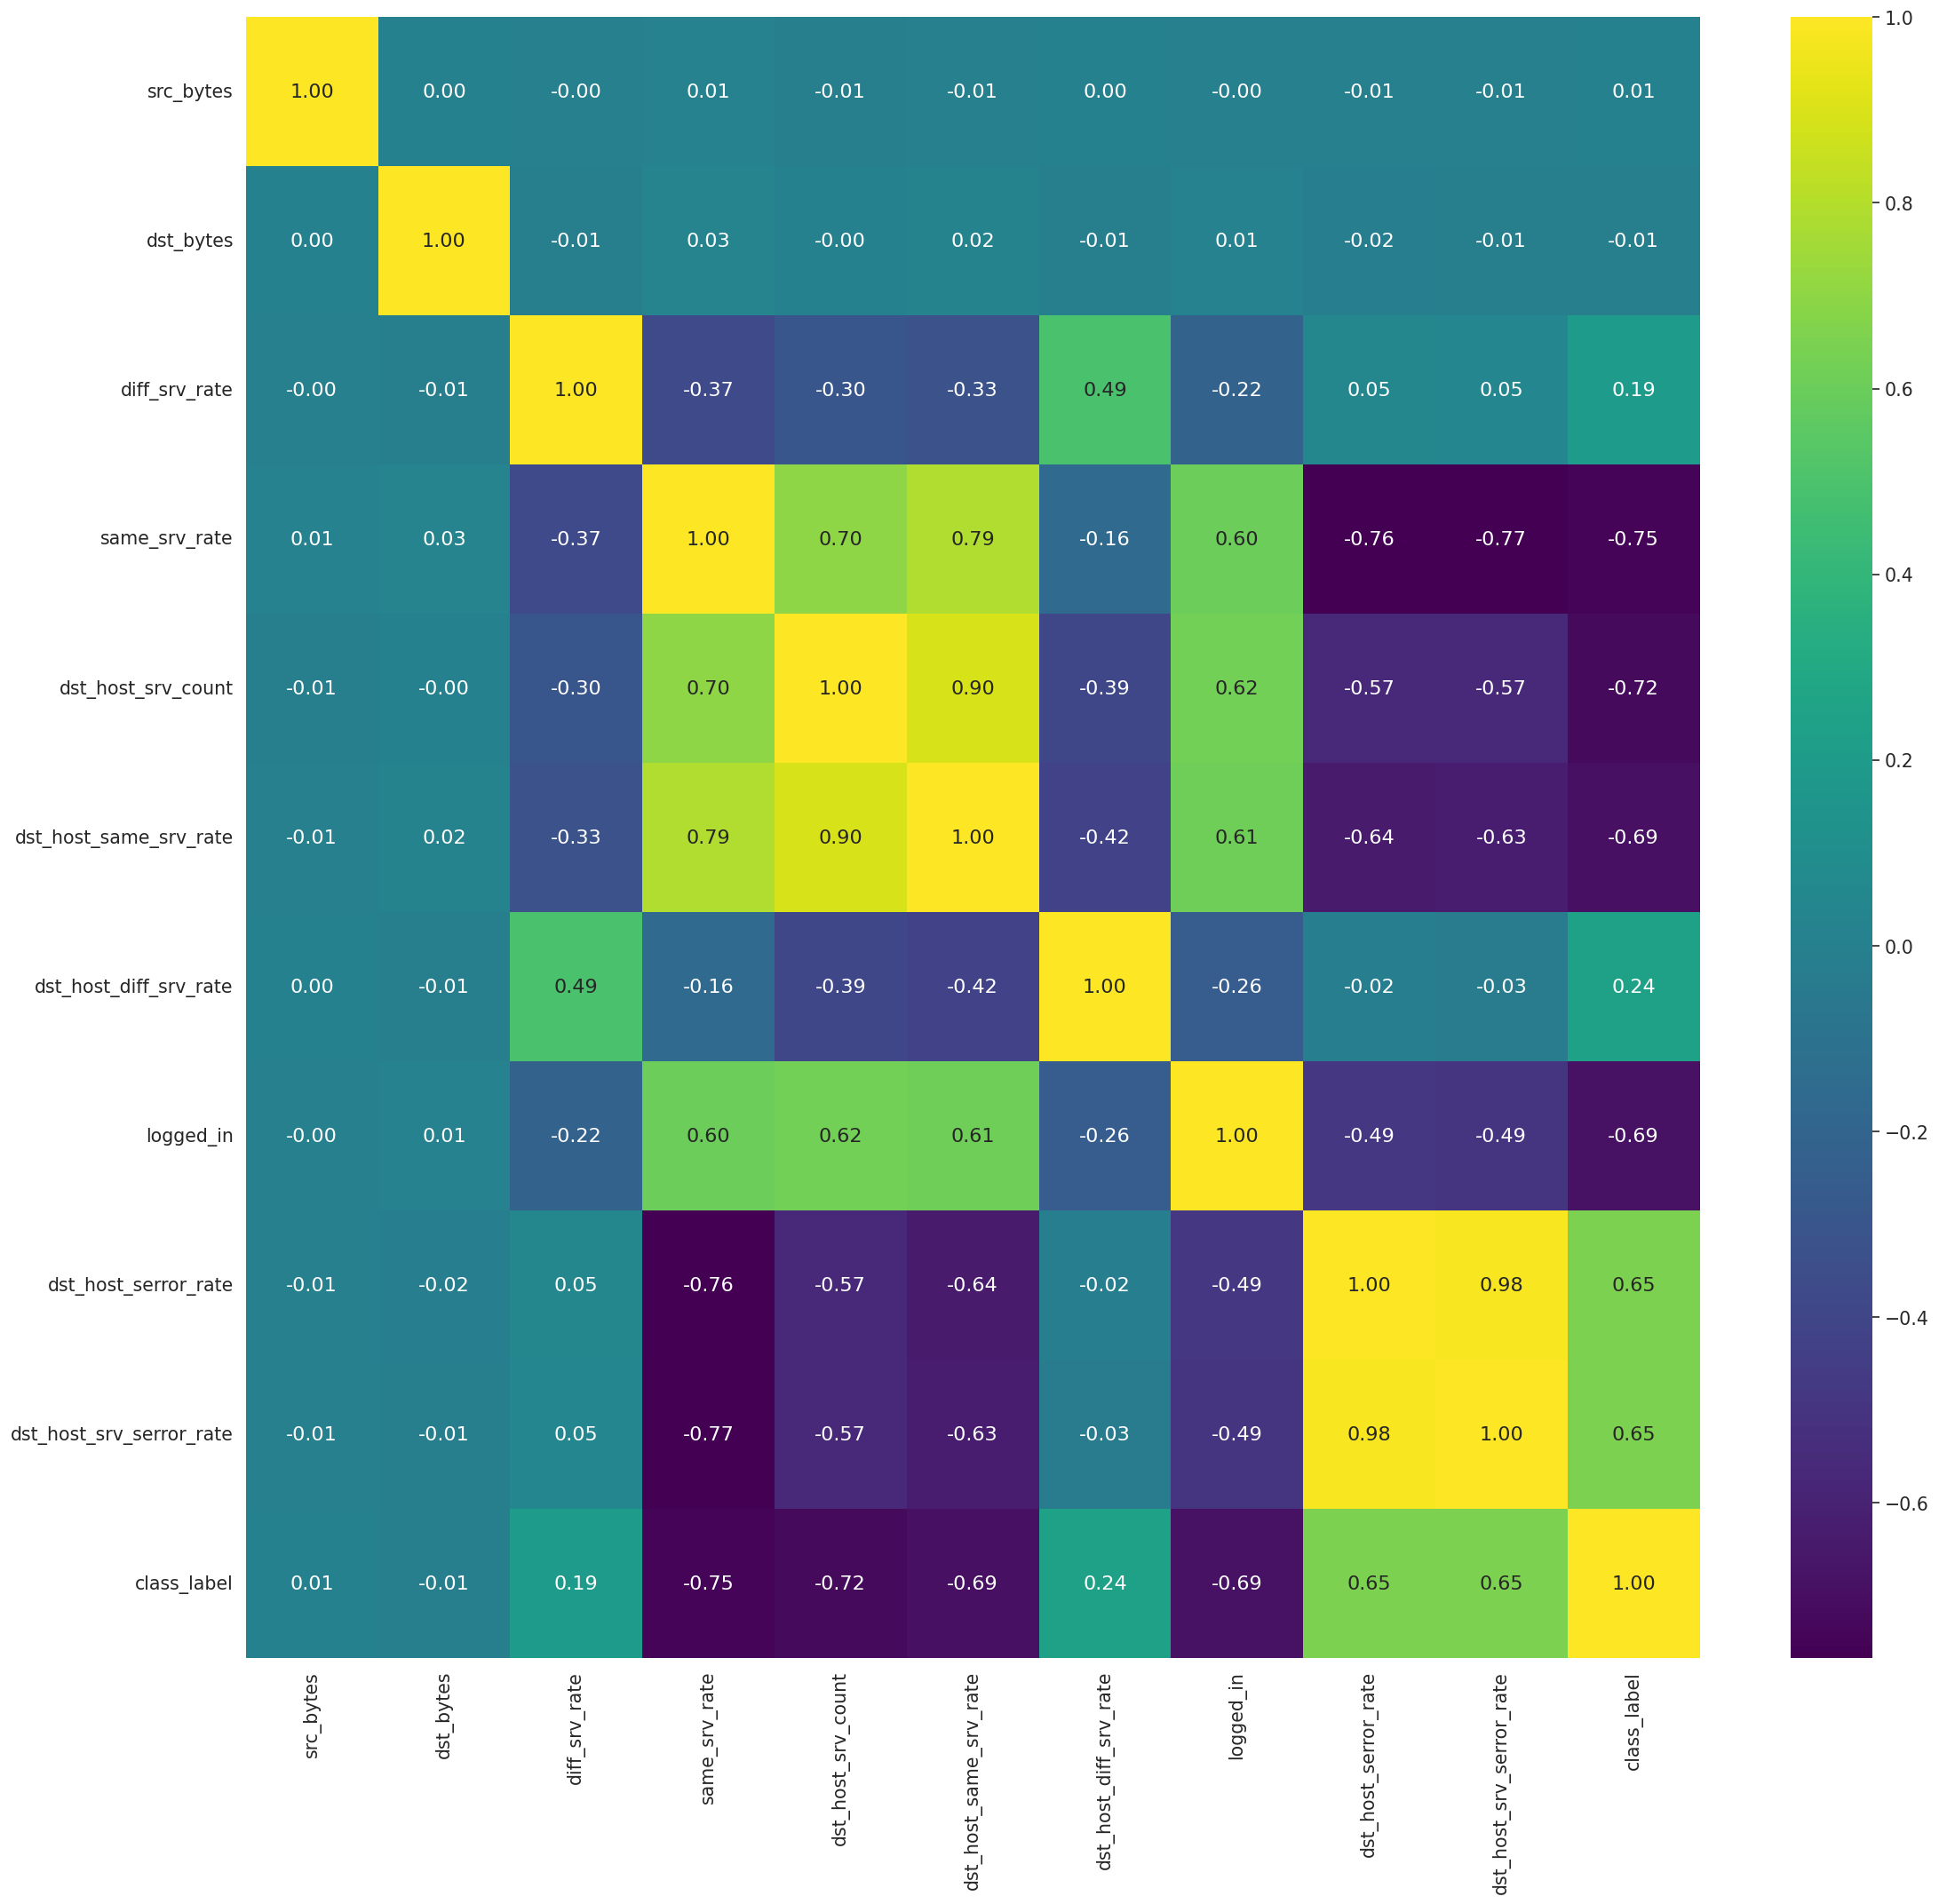

In [118]:
int_corr = int_corr.corr()
plt.figure(figsize=(22, 20))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(int_corr, annot=True, cmap='viridis', fmt='.2f')
plt.show()

# Splitting Data

In [119]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count', 'class_label']]

In [120]:
top_10_info_gain

,src_bytes,dst_bytes,diff_srv_rate,same_srv_rate,dst_host_srv_count,class_label
0,491,0,0.00,1.00,25,0
1,146,0,0.15,0.08,1,0
2,0,0,0.07,0.05,26,1
3,232,8153,0.00,1.00,255,0
4,199,420,0.00,1.00,255,0
...,...,...,...,...,...,...
25187,0,0,0.07,0.07,7,1
25188,334,0,0.00,1.00,39,1
25189,0,0,0.07,0.07,13,1
25190,0,0,0.06,0.14,20,1


In [121]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# Create a subset of the dataset excluding the specified columns
subset_data_train = top_10_info_gain[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count']]

# Perform z-score normalization on the selected columns
std_scaler = StandardScaler()
normalized_data_train = std_scaler.fit_transform(subset_data_train)

# Create a DataFrame with normalized data
normalized_df_train = pd.DataFrame(normalized_data_train, columns=subset_data_train.columns)
normalized_df_train['class_label'] = top_10_info_gain['class_label']
normalized_df_train.describe()

,src_bytes,dst_bytes,diff_srv_rate,same_srv_rate,dst_host_srv_count,class_label
count,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,25192.000000
mean,1.410255e-19,-5.641019e-19,-4.195508e-18,-1.452562e-17,-6.035890e-17,0.466140
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.498862
min,-1.009252e-02,-3.930979e-02,-3.492819e-01,-1.502538e+00,-1.039933e+00,0.000000
25%,-1.009252e-02,-3.930979e-02,-3.492819e-01,-1.297820e+00,-9.495537e-01,0.000000
50%,-1.007427e-02,-3.930979e-02,-3.492819e-01,7.721087e-01,-4.886186e-01,0.000000
75%,-9.976793e-03,-3.334045e-02,-1.323494e-02,7.721087e-01,1.264742e+00,1.000000
max,1.583257e+02,5.795287e+01,5.251501e+00,7.721087e-01,1.264742e+00,1.000000


In [122]:
from sklearn.model_selection import train_test_split
X = normalized_df_train.drop(["class_label"], axis=1)
y = normalized_df_train["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [123]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

In [124]:
y_train

19587    1
16612    1
6253     0
15949    0
17763    1
        ..
15856    0
6131     0
10381    1
6310     0
9382     0
Name: class_label, Length: 17634, dtype: int64

In [125]:
y_train.value_counts()

class_label
0    9396
1    8238
Name: count, dtype: int64

# xgBoost - benchmark and GA Accuracy measure

In [126]:
top_10_info = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [127]:
from sklearn.model_selection import train_test_split
# X_base = int_data_no_strings.drop(["class_label"], axis=1)
# y_base = int_data_no_strings["class_label"]
X_base = int_data_no_strings.drop(["class_label"], axis=1)
y_base = int_data_no_strings["class_label"]
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.3)

In [128]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X_base = X_test_base[-2500:]
futureSample_y_base = y_test_base[-2500:]

# Remove the last two hundred samples from the test dataset
X_test_base = X_test_base[0:-2500]
y_test_base = y_test_base[0:-2500]

In [129]:
X_test_base

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
854,0,200,3042,0,0,0,0,0,1,0,...,42,255,1.00,0.00,0.02,0.03,0.0,0.00,0.0,0.0
15370,0,0,0,0,0,0,0,0,0,0,...,255,18,0.07,0.06,0.00,0.00,1.0,1.00,0.0,0.0
20822,0,0,0,0,0,0,0,0,0,0,...,255,20,0.08,0.07,0.00,0.00,1.0,1.00,0.0,0.0
13781,0,220,4315,0,0,0,0,0,1,0,...,21,30,1.00,0.00,0.05,0.17,0.0,0.00,0.0,0.0
4501,0,1447,334,0,0,0,0,0,1,0,...,133,92,0.69,0.04,0.01,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13121,0,0,0,0,0,0,0,0,0,0,...,255,20,0.08,0.07,0.00,0.00,1.0,1.00,0.0,0.0
18199,3,1996,338,0,0,0,0,0,1,0,...,57,214,0.86,0.05,0.02,0.01,0.0,0.00,0.0,0.0
12343,9801,1,0,0,0,0,0,0,0,0,...,255,2,0.01,0.74,1.00,0.00,0.0,0.00,1.0,1.0
495,0,0,0,0,0,0,0,0,0,0,...,255,20,0.08,0.05,0.00,0.00,1.0,1.00,0.0,0.0


In [130]:
from sklearn.ensemble import GradientBoostingClassifier
xgBoostClassifier = GradientBoostingClassifier()
xgBoostClassifier.fit(X_test_base, y_test_base)

GradientBoostingClassifier()

## Measure Gradient Boost's performance

In [131]:
# Predict the class labels of samples in the test dataset
y_pred_xgb = xgBoostClassifier.predict(X_test_base)

In [132]:
score_test = accuracy_score(y_test_base, y_pred_xgb)
print (score_test)

0.9974298141557928


In [133]:
precision_test = precision_score(y_test_base, y_pred_xgb, average='macro')
print (precision_test)

0.9973956890254654


In [134]:
recall_test = recall_score(y_test_base, y_pred_xgb, average='macro')
print (recall_test)

0.9974285003119616


In [135]:
f1_test =  f1_score(y_test_base, y_pred_xgb, average='macro')
print(f1_test)

0.9974120548714897


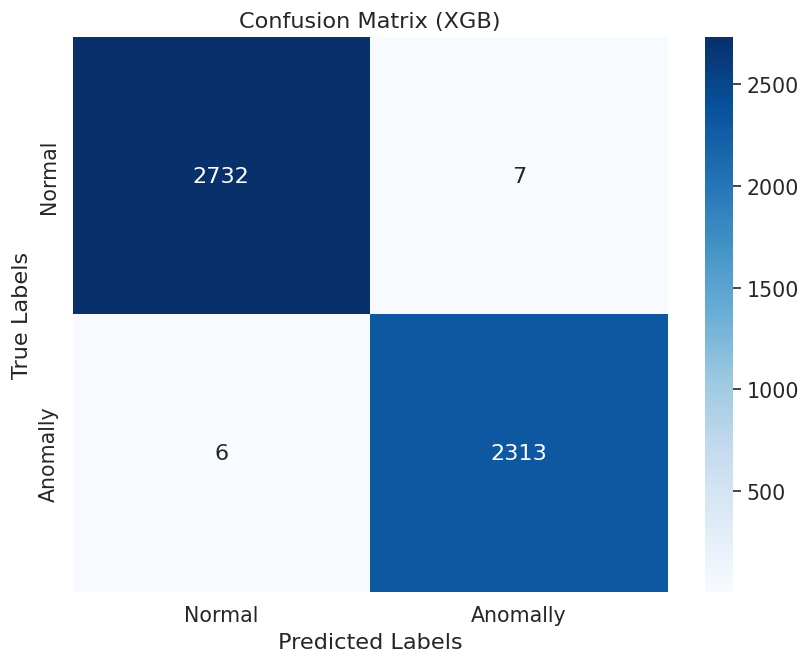

In [136]:
mat = confusion_matrix(y_test_base, y_pred_xgb)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (XGB)")
plt.show()

The AUC is 1.000


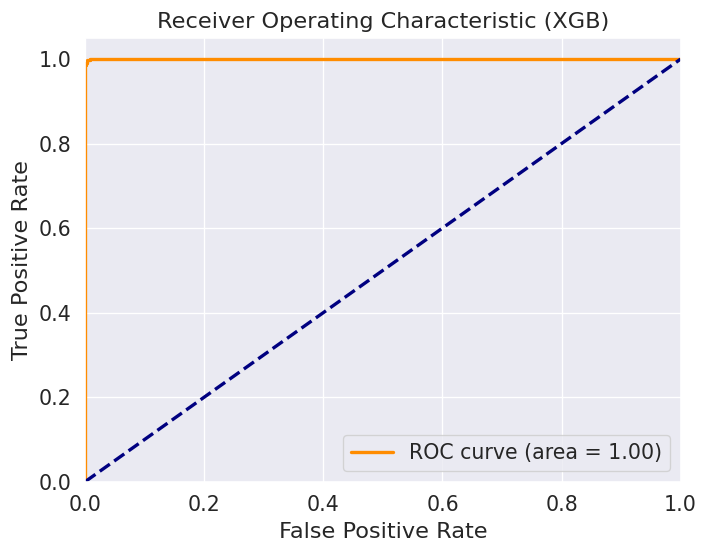

In [137]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = xgBoostClassifier.predict_proba(X_test_base)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test_base, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test_base, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGB)')
plt.legend(loc="lower right")
plt.show()

# Genetic Algorithm - Feature Selection (Using Models)

Reference - https://www.kaggle.com/code/tanmayunhale/genetic-algorithm-for-feature-selection

In [138]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [139]:
def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train_base.iloc[:,chromosome],y_train_base)
        predictions = logmodel.predict(X_test_base.iloc[:,chromosome])
        scores.append(accuracy_score(y_test_base,predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

In [140]:
def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

In [141]:
def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


In [142]:
def mutation(pop_after_cross,mutation_rate,n_feat):
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0,mutation_range):
            pos = np.random.randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

In [143]:
def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [144]:
z = X_base.shape[1]
z

38

In [145]:
logmodel = xgBoostClassifier
chromo_df_bc, score_bc = generations(X_base,y_base,size=80, n_feat=X_base.shape[1], n_parents=64,
                                  mutation_rate=0.20,n_gen=5, X_train = X_train_base,
                                  X_test = X_test_base, Y_train = y_train_base, Y_test = y_test_base)

KeyboardInterrupt: 

In [ ]:
len(int_data_no_strings.columns)

In [ ]:
selected_features = X_base.columns[chromo_df_bc[4]]
print(selected_features.tolist())

In [ ]:
len(selected_features.tolist())

# Support Vector Machine

In [146]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# Create a subset of the dataset excluding the specified columns
subset_data_train = int_data_no_strings[['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'logged_in', 'num_compromised', 'root_shell', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']]
# subset_data_train = int_data_no_strings
# Perform z-score normalization on the selected columns
std_scaler = StandardScaler()
normalized_data_train = std_scaler.fit_transform(subset_data_train)

# Create a DataFrame with normalized data
normalized_df_train = pd.DataFrame(normalized_data_train, columns=subset_data_train.columns)
normalized_df_train['class_label'] = top_10_info_gain['class_label']
normalized_df_train.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,logged_in,num_compromised,root_shell,num_root,num_file_creations,...,num_access_files,count,serror_rate,rerror_rate,same_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,class_label
count,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,...,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,25192.000000
mean,1.424357e-17,1.410255e-19,-5.641019e-19,-1.579485e-17,3.878200e-19,4.371790e-17,8.955117e-18,-1.191665e-17,9.589732e-18,6.205121e-18,...,2.185895e-17,8.017298e-17,7.862170e-18,1.523075e-17,-1.452562e-17,1.635895e-17,6.176916e-17,-6.924351e-17,-1.231505e-16,0.466140
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,...,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.498862
min,-1.135507e-01,-1.009252e-02,-3.930979e-02,-9.122318e-02,-6.300533e-03,-8.076258e-01,-2.187261e-02,-3.937653e-02,-2.172416e-02,-2.780802e-02,...,-4.391678e-02,-7.289642e-01,-6.401420e-01,-3.721856e-01,-1.502538e+00,-4.781831e-01,-2.879935e-01,-6.418041e-01,-6.273647e-01,0.000000
25%,-1.135507e-01,-1.009252e-02,-3.930979e-02,-9.122318e-02,-6.300533e-03,-8.076258e-01,-2.187261e-02,-3.937653e-02,-2.172416e-02,-2.780802e-02,...,-4.391678e-02,-7.202436e-01,-6.401420e-01,-3.721856e-01,-1.297820e+00,-4.781831e-01,-2.879935e-01,-6.418041e-01,-6.273647e-01,0.000000
50%,-1.135507e-01,-1.007427e-02,-3.930979e-02,-9.122318e-02,-6.300533e-03,-8.076258e-01,-2.187261e-02,-3.937653e-02,-2.172416e-02,-2.780802e-02,...,-4.391678e-02,-6.155966e-01,-6.401420e-01,-3.721856e-01,7.721087e-01,-4.781831e-01,-2.879935e-01,-6.418041e-01,-6.273647e-01,0.000000
75%,-1.135507e-01,-9.976793e-03,-3.334045e-02,-9.122318e-02,-6.300533e-03,1.238197e+00,-2.187261e-02,-3.937653e-02,-2.172416e-02,-2.780802e-02,...,-4.391678e-02,5.180798e-01,1.595477e+00,-3.721856e-01,7.721087e-01,-2.836056e-01,-1.071171e-01,1.603834e+00,1.614454e+00,1.000000
max,1.584102e+01,1.583257e+02,5.795287e+01,1.143768e+01,1.587167e+02,1.238197e+00,8.483823e+01,2.539584e+01,8.475636e+01,7.550206e+01,...,8.115620e+01,3.718535e+00,1.595477e+00,2.765176e+00,7.721087e-01,2.764775e+00,8.755824e+00,1.603834e+00,1.614454e+00,1.000000


In [147]:
from sklearn.model_selection import train_test_split
X = normalized_df_train.drop(["class_label"], axis=1)
y = normalized_df_train["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [148]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

## Train SVM

In [149]:
SVM_classifier = SVC(probability=True)
SVM_classifier.fit(X_train, y_train)

SVC(probability=True)

## Measure SVM's performance

In [150]:
# Predict the class labels of samples in the test dataset
y_pred_SVM = SVM_classifier.predict(X_test)

In [151]:
score_test = accuracy_score(y_test, y_pred_SVM)
print (score_test)

0.9675761170423092


In [152]:
precision_test = precision_score(y_test, y_pred_SVM, average='macro')
print (precision_test)

0.9686487243788244


In [153]:
recall_test = recall_score(y_test, y_pred_SVM, average='macro')
print (recall_test)

0.9663021777920499


In [154]:
f1_test =  f1_score(y_test, y_pred_SVM, average='macro')
print(f1_test)

0.9672961330750178


In [155]:
X_test.shape

(5058, 20)

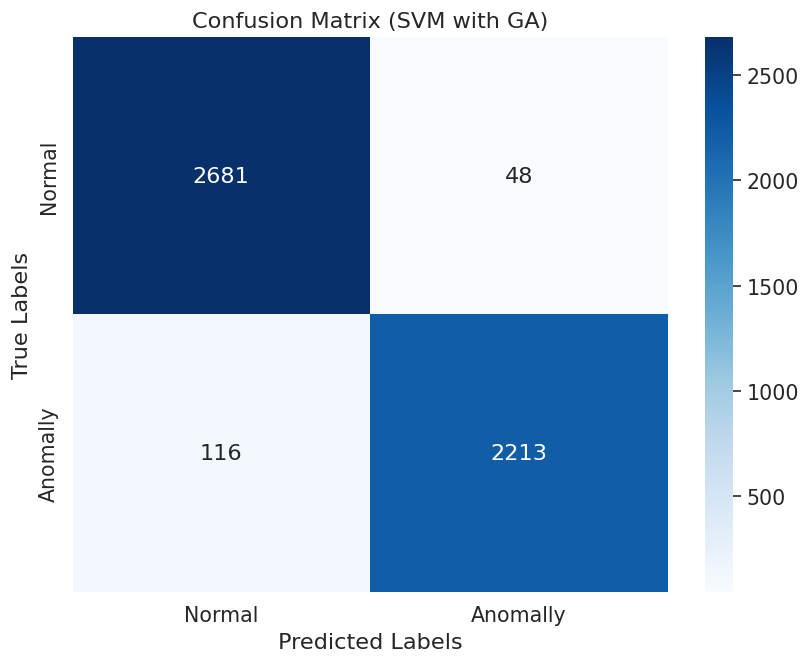

In [156]:
mat = confusion_matrix(y_test, y_pred_SVM)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (SVM with GA)")
plt.show()

In [157]:
report = classification_report(y_test, y_pred_SVM)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2729
           1       0.98      0.95      0.96      2329

    accuracy                           0.97      5058
   macro avg       0.97      0.97      0.97      5058
weighted avg       0.97      0.97      0.97      5058



## ROC Curve

The AUC is 0.991


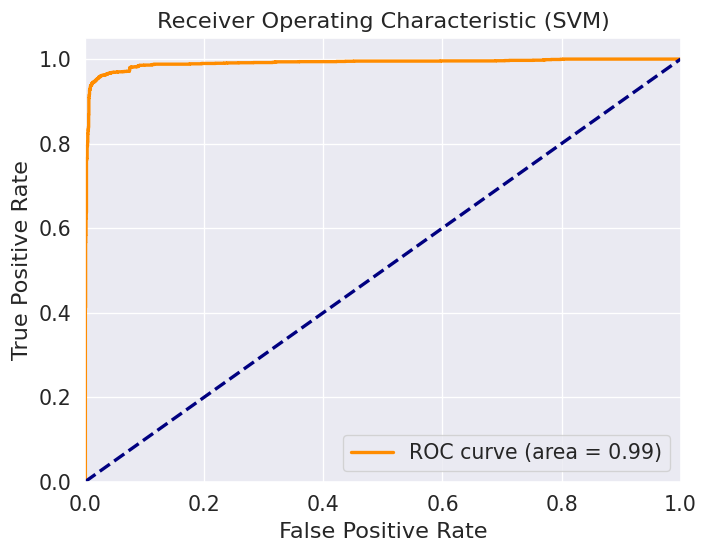

In [158]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

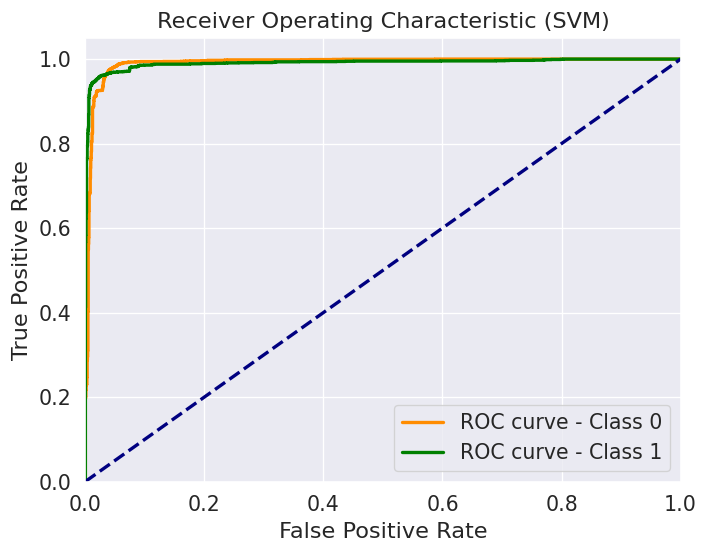

In [159]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [160]:
solution_validate = SVM_classifier.predict(futureSample_X)

In [161]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.9656


#Naive Bayes

## Splitting Data

In [162]:
top_10_info_gain = int_data_no_strings[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [163]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [164]:
# Normalisation
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
y_scaler = StandardScaler()

# X_scaler.fit(X_train)

X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

# y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
# y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [165]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-200:]
futureSample_y = y_test[-200:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-200]
y_test = y_test[0:-200]

In [166]:
y_train.value_counts()

class_label
0    9455
1    8179
Name: count, dtype: int64

## Train Naive Bayes

In [167]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, y_train)

GaussianNB()

In [168]:
# Predict the class labels of samples in the test dataset
y_pred_GNB = GNB_classifier.predict(X_test)

In [169]:
score_test = accuracy_score(y_test, y_pred_GNB)
print (score_test)

0.8812177222071215


In [170]:
precision_test = precision_score(y_test, y_pred_GNB, average='macro')
print (precision_test)

0.8857560975978582


In [171]:
recall_test = recall_score(y_test, y_pred_GNB, average='macro')
print (recall_test)

0.8781543009493857


In [172]:
f1_test =  f1_score(y_test, y_pred_GNB, average='macro')
print(f1_test)

0.8799231495250956


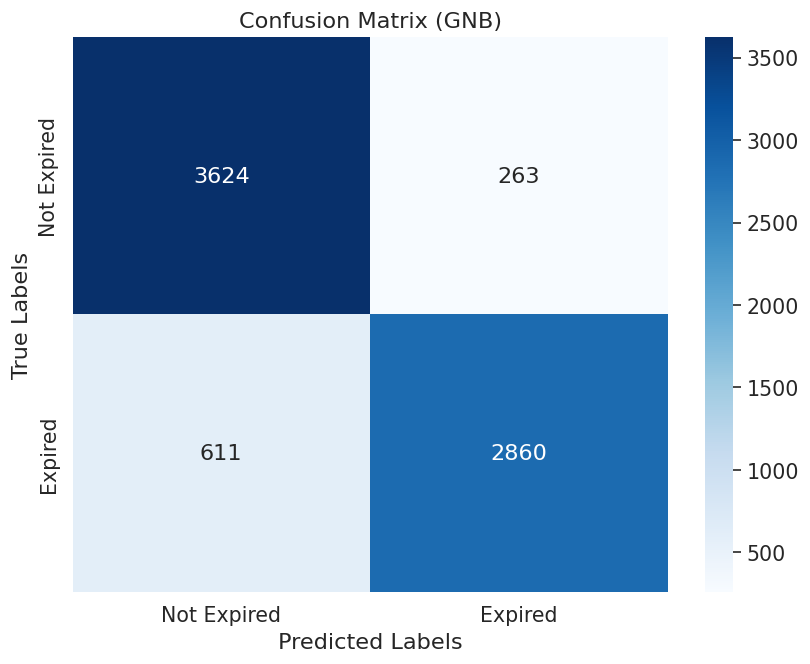

In [173]:
mat = confusion_matrix(y_test, y_pred_GNB)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (GNB)")
plt.show()

In [174]:
report = classification_report(y_test, y_pred_GNB)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3887
           1       0.92      0.82      0.87      3471

    accuracy                           0.88      7358
   macro avg       0.89      0.88      0.88      7358
weighted avg       0.88      0.88      0.88      7358



## ROC Curve

The AUC is 0.957
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.625 vs 0.006
1.000	0.626 vs 0.006
1.000	0.627 vs 0.006
1.000	0.628 vs 0.006
1.000	0.628 vs 0.006
1.000	0.628 vs 0.006
1.000	0.628 vs 0.007
1.000	0.628 vs 0.007
1.000	0.630 vs 0.007
1.000	0.630 vs 0.007
1.000	0.630 vs 0.007
1.000	0.631 vs 0.007
1.000	0.632 vs 0.007
1.000	0.633 vs 0.007
1.000	0.633 vs 0.007
1.000	0.633 vs 0.007
1.000	0.633 vs 0.007
1.000	0.633 vs 0.008
1.000	0.634 vs 0.008
1.000	0.634 vs 0.008
1.000	0.635 vs 0.008
1.000	0.635 vs 0.008
1.000	0.635 vs 0.008
1.000	0.635 vs 0.009
1.000	0.636 vs 0.009
1.000	0.636 vs 0.010
1.000	0.636 vs 0.010
1.000	0.636 vs 0.010
1.000	0.636 vs 0.010
1.000	0.636 vs 0.011
1.000	0.637 vs 0.011
1.000	0.637 vs 0.011
1.000	0.638 vs 0.011
1.000	0.638 vs 0.012
1.000	0.639 vs 0.012
1.000	0.639 vs 0.012
1.000	0.639 vs 0.012
1.000	0.639 vs 0.013
1.000	0.640 vs 0.013
1.000	0.640 vs 0.013
1.000	0.640 vs 0.013
1.000	0.640 vs 0.013
1.000	0.641 vs 0.013
1.000	0.641 vs 0.014
1.000	0.641 vs 0.

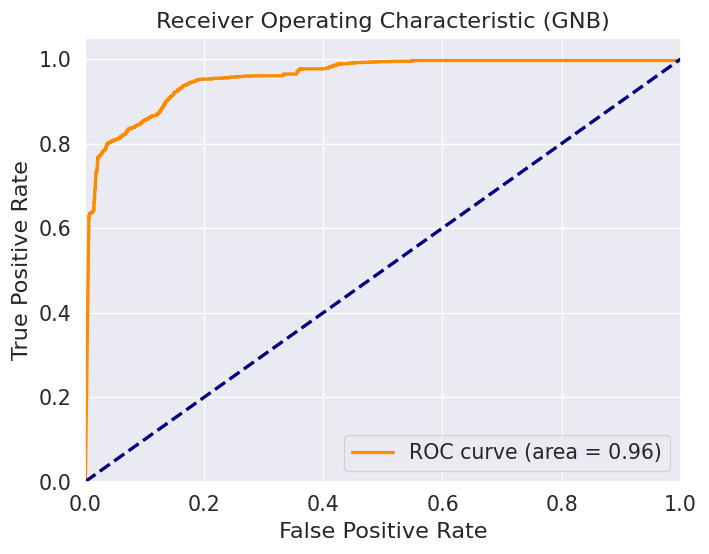

In [175]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

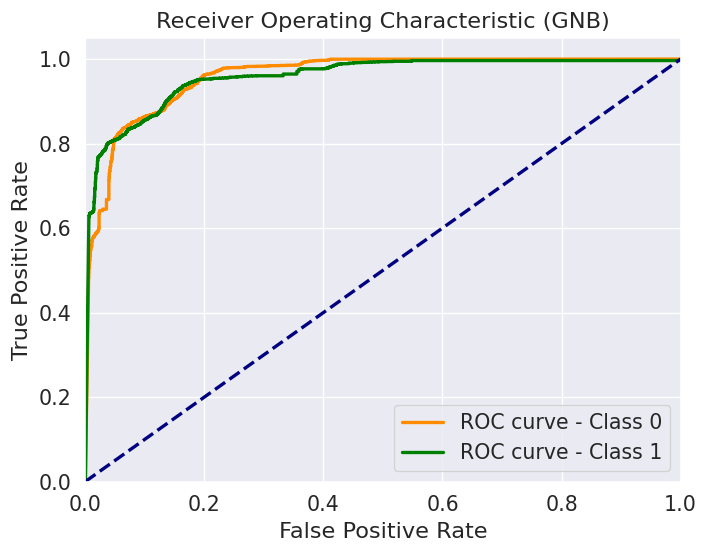

In [176]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [177]:
solution_validate = GNB_classifier.predict(futureSample_X)

In [178]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.885


# Decision Tree

## Splitting Data

In [180]:
int_data_no_strings = intrusion_data_right.select_dtypes(exclude=['object'])
int_data_no_strings

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,334,0,0,0,0,0,0,1,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,0,0,0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,0,0,0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [181]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [182]:
top_10_info_gain = int_data_no_strings

In [183]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [184]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

In [185]:
futureSample_X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
9168,17944,1,0,0,0,0,0,0,0,0,...,255,2,0.01,0.73,1.00,0.00,0.0,0.0,1.00,1.0
19846,0,0,0,0,0,0,0,0,0,0,...,255,20,0.08,0.08,0.00,0.00,1.0,1.0,0.00,0.0
9029,39804,1,0,0,0,0,0,0,0,0,...,255,2,0.01,0.50,1.00,0.00,0.0,0.0,1.00,1.0
8846,0,0,0,0,0,0,0,0,0,0,...,255,11,0.04,0.06,0.00,0.00,1.0,1.0,0.00,0.0
1226,0,748,0,0,0,0,0,0,1,0,...,186,46,0.25,0.02,0.25,0.00,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23973,0,4892,0,0,0,0,0,0,1,0,...,255,54,0.21,0.02,0.21,0.00,0.0,0.0,0.69,0.0
15706,0,8,0,0,0,0,0,0,0,0,...,2,35,1.00,0.00,1.00,0.51,0.0,0.0,0.00,0.0
17805,5,1463,334,0,0,0,0,0,1,0,...,200,120,0.41,0.04,0.00,0.02,0.0,0.0,0.00,0.0
1571,1,0,15,0,0,0,0,0,0,0,...,227,2,0.00,0.03,0.00,1.00,0.0,0.0,0.00,0.5


In [186]:
y_train.value_counts()

class_label
0    9430
1    8204
Name: count, dtype: int64

## Train Decision Tree

In [187]:
# DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=40,
#                                        min_samples_leaf=1, min_samples_split=2)
DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=100, min_samples_split=300)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=100,
                       min_samples_split=300)

## Measure Decision Tree's performance

In [188]:
# Predict the class labels of samples in the test dataset
y_pred_DT = DT_classifier.predict(X_test)

In [189]:
score_test = accuracy_score(y_test, y_pred_DT)
print (score_test)

0.9746935547647292


In [190]:
precision_test = precision_score(y_test, y_pred_DT, average='macro')
print (precision_test)

0.9738862595459377


In [191]:
recall_test = recall_score(y_test, y_pred_DT, average='macro')
print (recall_test)

0.9755158995650535


In [192]:
f1_test =  f1_score(y_test, y_pred_DT, average='macro')
print(f1_test)

0.9745618106227261


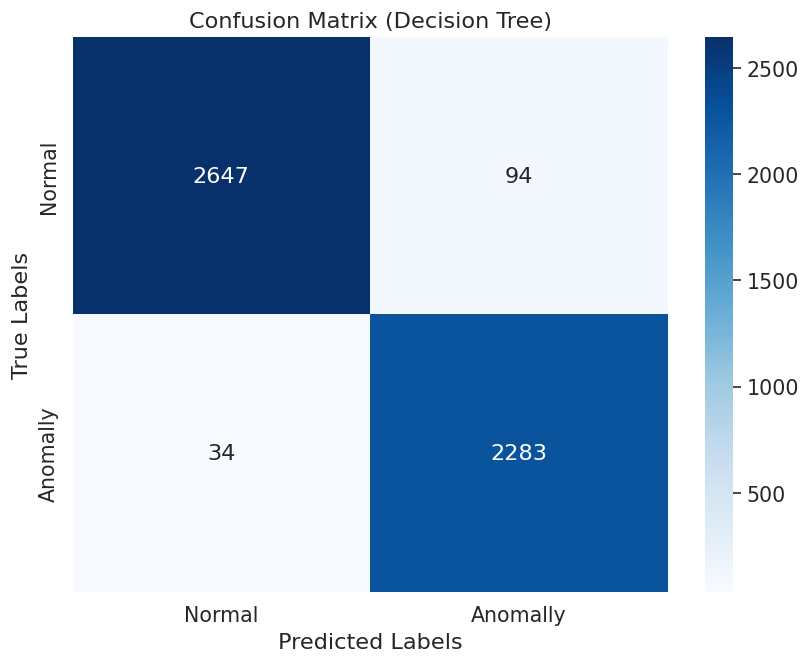

In [193]:
mat = confusion_matrix(y_test, y_pred_DT)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

In [194]:
report = classification_report(y_test, y_pred_DT)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2741
           1       0.96      0.99      0.97      2317

    accuracy                           0.97      5058
   macro avg       0.97      0.98      0.97      5058
weighted avg       0.98      0.97      0.97      5058



## ROC Curve

The AUC is 0.996
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.842 vs 0.000
0.991	0.852 vs 0.000
0.985	0.884 vs 0.000
0.963	0.901 vs 0.001
0.782	0.913 vs 0.003
0.709	0.923 vs 0.008
0.707	0.945 vs 0.015
0.678	0.955 vs 0.019
0.677	0.964 vs 0.026
0.673	0.985 vs 0.034
0.340	0.989 vs 0.042
0.116	0.990 vs 0.052
0.112	0.992 vs 0.069
0.108	0.996 vs 0.092
0.053	0.996 vs 0.099
0.052	0.997 vs 0.115
0.020	0.998 vs 0.133
0.007	0.998 vs 0.167
0.000	1.000 vs 1.000


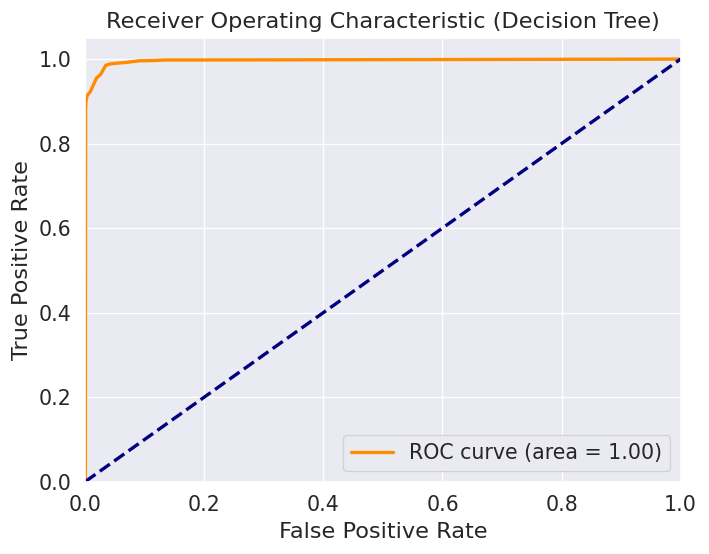

In [195]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

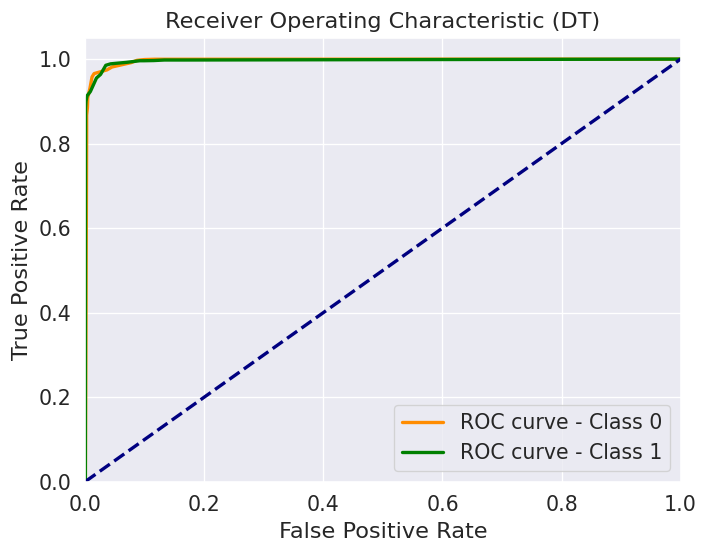

In [196]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (DT)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [197]:
solution_validate = DT_classifier.predict(futureSample_X)

In [198]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.98


# Random Forrest

##Splitting Data

In [199]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [200]:
top_10_info_gain = int_data_no_strings

In [201]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [202]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-200:]
futureSample_y = y_test[-200:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-200]
y_test = y_test[0:-200]

In [203]:
y_train.value_counts()

class_label
0    9356
1    8278
Name: count, dtype: int64

## Train Random Forrest

In [204]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(
    criterion='entropy',
    max_depth=30,  # Reducing max_depth
    min_samples_leaf=50,  # Increasing min_samples_leaf further
    min_samples_split=100,  # Increasing min_samples_split further
    n_estimators=200,  # Reducing the number of estimators further
    max_features=0.2,  # Using a smaller fraction of features for each split
    bootstrap=True,
    oob_score=True,
    random_state=42,
    class_weight='balanced_subsample'  # Handling class imbalance by subsampling
)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=30, max_features=0.2, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200, oob_score=True,
                       random_state=42)

## Measure Random Forrest's performance

In [205]:
X_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
7347,0,221,294,0,0,0,0,0,1,0,...,187,255,1.00,0.00,0.01,0.01,0.0,0.0,0.00,0.00
12535,0,0,0,0,0,0,0,0,0,0,...,255,17,0.07,0.07,0.00,0.00,0.0,0.0,1.00,1.00
2686,0,383,0,0,0,0,0,0,0,0,...,35,3,0.09,0.09,0.09,0.00,0.0,0.0,0.00,0.00
4079,0,309,1942,0,0,0,0,0,1,0,...,68,255,1.00,0.00,0.01,0.04,0.0,0.0,0.00,0.00
14397,27241,1,0,0,0,0,0,0,0,0,...,255,2,0.01,0.74,1.00,0.00,0.0,0.0,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7620,0,1241,327,0,0,0,0,0,1,0,...,34,111,0.85,0.06,0.03,0.02,0.0,0.0,0.00,0.00
19554,0,17,70,0,0,0,0,0,0,0,...,147,209,0.90,0.01,0.90,0.01,0.0,0.0,0.07,0.00
4093,2,3145,325,0,0,0,0,0,1,0,...,88,66,0.64,0.03,0.01,0.03,0.0,0.0,0.00,0.00
9934,0,0,0,0,0,0,0,0,0,0,...,255,3,0.01,0.07,0.00,0.00,1.0,1.0,0.00,0.00


In [206]:
# Predict the class labels of samples in the test dataset
y_pred_RF = RF_classifier.predict(X_test)

In [207]:
score_test = accuracy_score(y_test, y_pred_RF)
print (score_test)

0.9896711062788801


In [208]:
precision_test = precision_score(y_test, y_pred_RF, average='macro')
print (precision_test)

0.9901960177105062


In [209]:
recall_test = recall_score(y_test, y_pred_RF, average='macro')
print (recall_test)

0.989044447774641


In [210]:
f1_test =  f1_score(y_test, y_pred_RF, average='macro')
print(f1_test)

0.9895805384533746


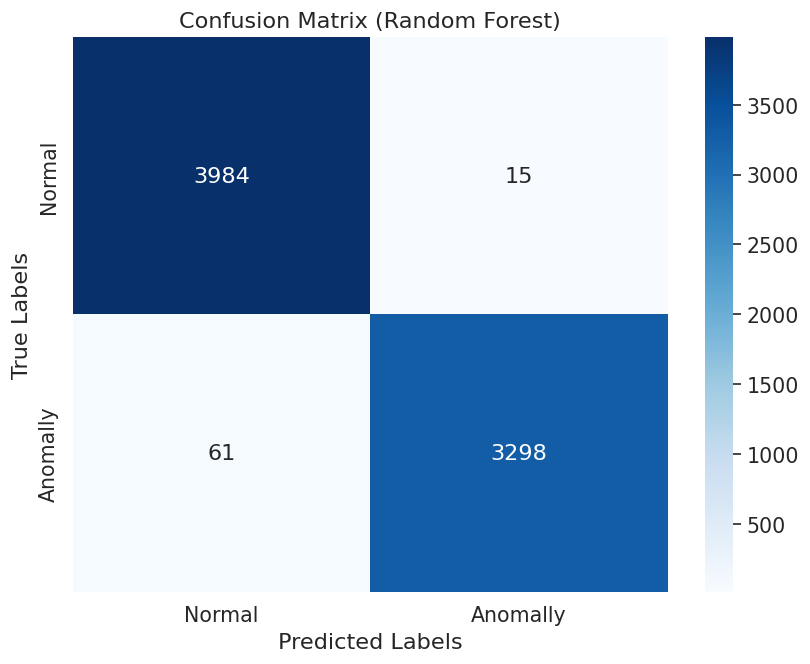

In [211]:
mat = confusion_matrix(y_test, y_pred_RF)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

In [212]:
report = classification_report(y_test, y_pred_RF)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3999
           1       1.00      0.98      0.99      3359

    accuracy                           0.99      7358
   macro avg       0.99      0.99      0.99      7358
weighted avg       0.99      0.99      0.99      7358



## ROC Curve

The AUC is 1.000
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.220 vs 0.000
1.000	0.290 vs 0.000
1.000	0.297 vs 0.000
1.000	0.302 vs 0.000
1.000	0.340 vs 0.000
1.000	0.342 vs 0.000
1.000	0.343 vs 0.000
1.000	0.349 vs 0.000
1.000	0.349 vs 0.000
1.000	0.350 vs 0.000
1.000	0.351 vs 0.000
1.000	0.352 vs 0.000
1.000	0.354 vs 0.000
1.000	0.354 vs 0.000
1.000	0.358 vs 0.000
1.000	0.358 vs 0.000
1.000	0.359 vs 0.000
1.000	0.361 vs 0.000
1.000	0.361 vs 0.000
1.000	0.362 vs 0.000
1.000	0.368 vs 0.000
1.000	0.368 vs 0.000
1.000	0.369 vs 0.000
1.000	0.372 vs 0.000
1.000	0.373 vs 0.000
1.000	0.375 vs 0.000
1.000	0.379 vs 0.000
1.000	0.382 vs 0.000
1.000	0.383 vs 0.000
1.000	0.384 vs 0.000
1.000	0.386 vs 0.000
1.000	0.387 vs 0.000
1.000	0.390 vs 0.000
1.000	0.396 vs 0.000
1.000	0.397 vs 0.000
1.000	0.398 vs 0.000
1.000	0.400 vs 0.000
1.000	0.400 vs 0.000
1.000	0.403 vs 0.000
1.000	0.403 vs 0.000
1.000	0.405 vs 0.000
1.000	0.405 vs 0.000
1.000	0.406 vs 0.000
1.000	0.408 vs 0.000
1.000	0.412 vs 0.

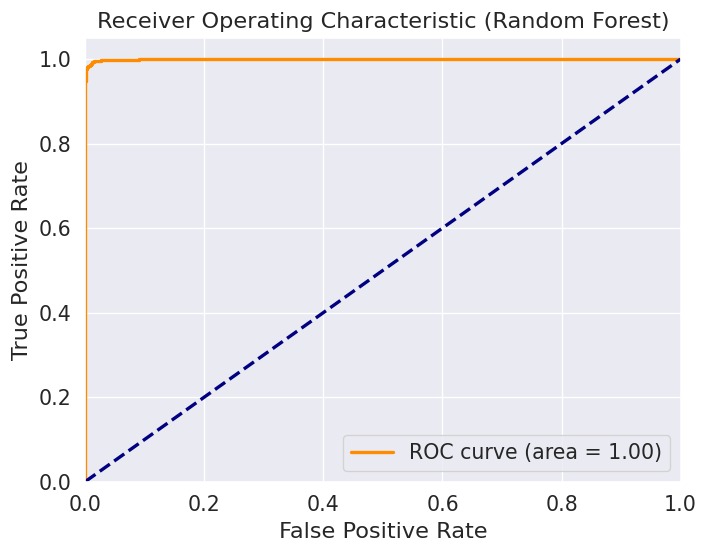

In [213]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

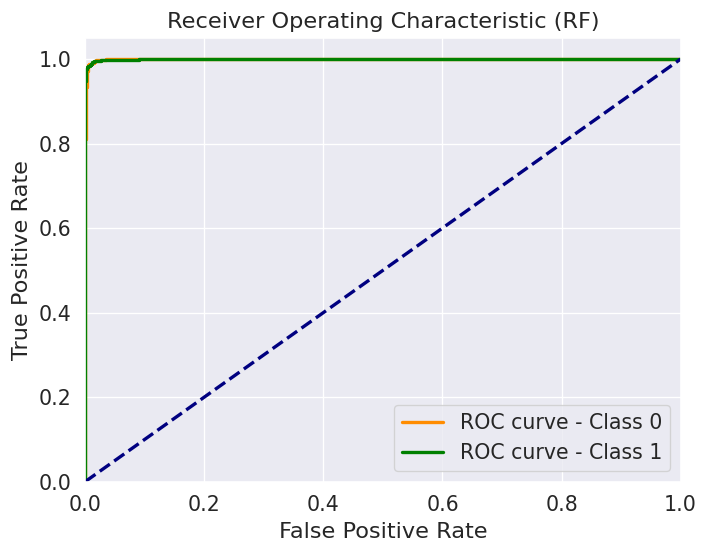

In [214]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [215]:
solution_validate = RF_classifier.predict(futureSample_X)

In [216]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.975


# Basic Neural Network

In [228]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 3), max_iter=1000, random_state=101)
nn_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 3), max_iter=1000,
              random_state=101, solver='lbfgs')

## Measure Basic Neural Network performance

In [229]:
# Predict the class labels of samples in the test dataset
y_pred_NN = nn_clf.predict(X_test)

In [230]:
score_test = accuracy_score(y_test, y_pred_NN)
print (score_test)

0.9654670547763958


In [231]:
precision_test = precision_score(y_test, y_pred_NN, average='macro')
print (precision_test)

0.9692170835773828


In [232]:
recall_test = recall_score(y_test, y_pred_NN, average='macro')
print (recall_test)

0.9629402339146454


In [222]:
f1_test =  f1_score(y_test, y_pred_NN, average='macro')
print(f1_test)

0.9650807002468113


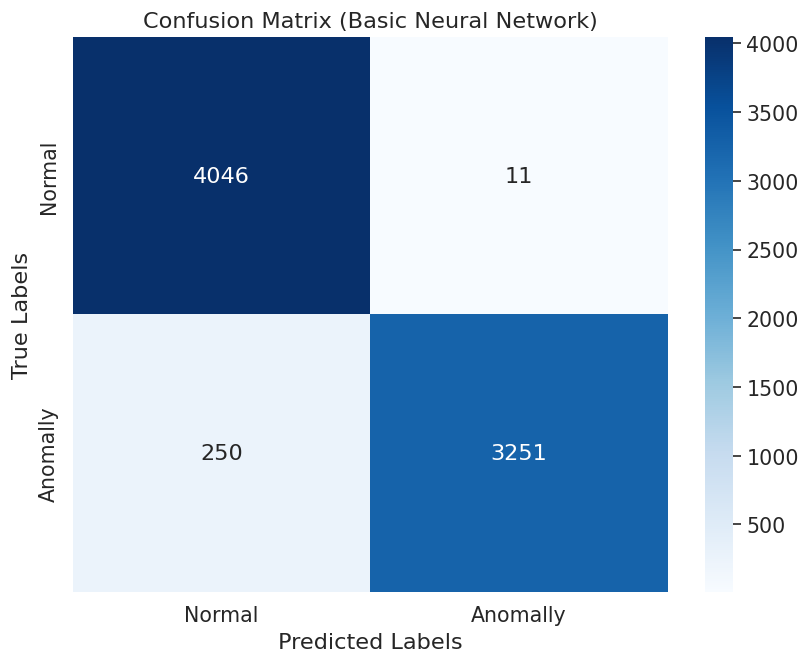

In [223]:
mat = confusion_matrix(y_test, y_pred_NN)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Basic Neural Network)")
plt.show()

In [224]:
report = classification_report(y_test, y_pred_NN)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4057
           1       1.00      0.93      0.96      3501

    accuracy                           0.97      7558
   macro avg       0.97      0.96      0.97      7558
weighted avg       0.97      0.97      0.97      7558



## ROC Curve

The AUC is 0.964


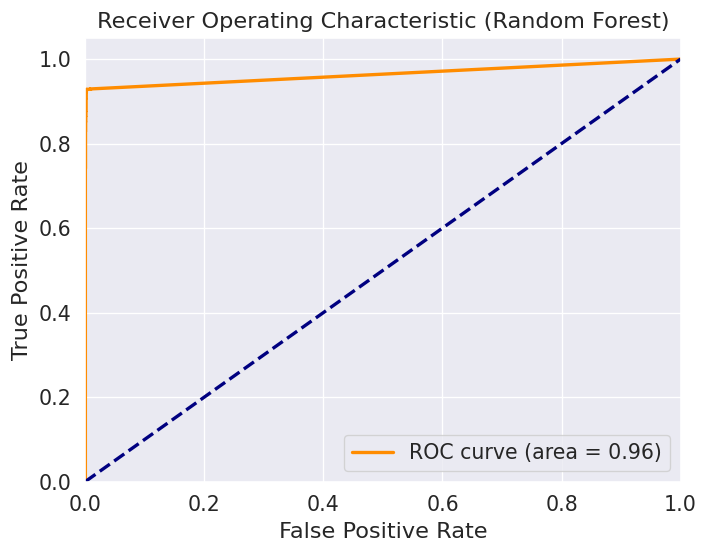

In [233]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = nn_clf.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

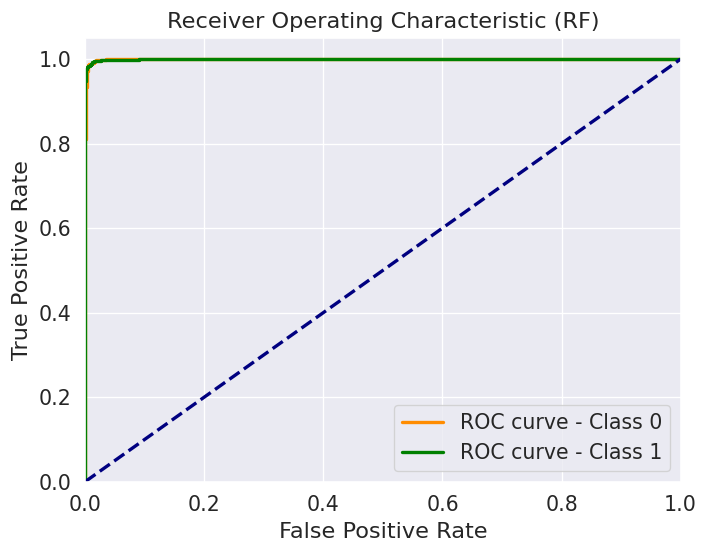

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF)')
plt.legend(loc="lower right")
plt.show()